In [2]:
# Import required libraries 

import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Reviewing the Dataset

In [26]:
# Load the data into dataframes by using pandas library

client_data = pd.read_csv("D:\\Data Analytics Internship Problem\\client_data.csv")
price_data = pd.read_csv("D:\\Data Analytics Internship Problem\\price_data.csv")

In [4]:
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [5]:
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,01-01-2015,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,01-02-2015,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,01-03-2015,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,01-04-2015,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,01-05-2015,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:
#Check for null values in the dataset

client_data.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [7]:
price_data.isna().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [8]:
# Check for duplicate rows

client_data.duplicated().sum()

0

In [9]:
price_data.duplicated().sum()

0

In [10]:
# Check for unique values in categorical columns
# Using 'display.max_columns' to display all the columns for selecting the categorical columns

pd.set_option('display.max_columns', None)
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [11]:
client_data['channel_sales'].nunique()

8

In [12]:
client_data['origin_up'].nunique()

6

In [13]:
# Lets count the number of customer who have churned in the dataset

client_data['churn'].value_counts()

0    13187
1     1419
Name: churn, dtype: int64

- Arouund 10% of the clinents in the dataset have churned and we are dealing with the imbalanced dataset. We will need to perform some feature engineering to create a balanced dataset before building the predictive model.

In [14]:
# Merge the 2 datasets on 'id' column

merged_data = pd.merge(client_data, price_data, on='id')

In [16]:
merged_data.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,01-01-2015,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,01-02-2015,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,01-03-2015,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,01-04-2015,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,01-05-2015,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [15]:
# shape of the dataset

merged_data.shape

(175149, 33)

# Exploratory Data Analysis for Customer Churn Prediction

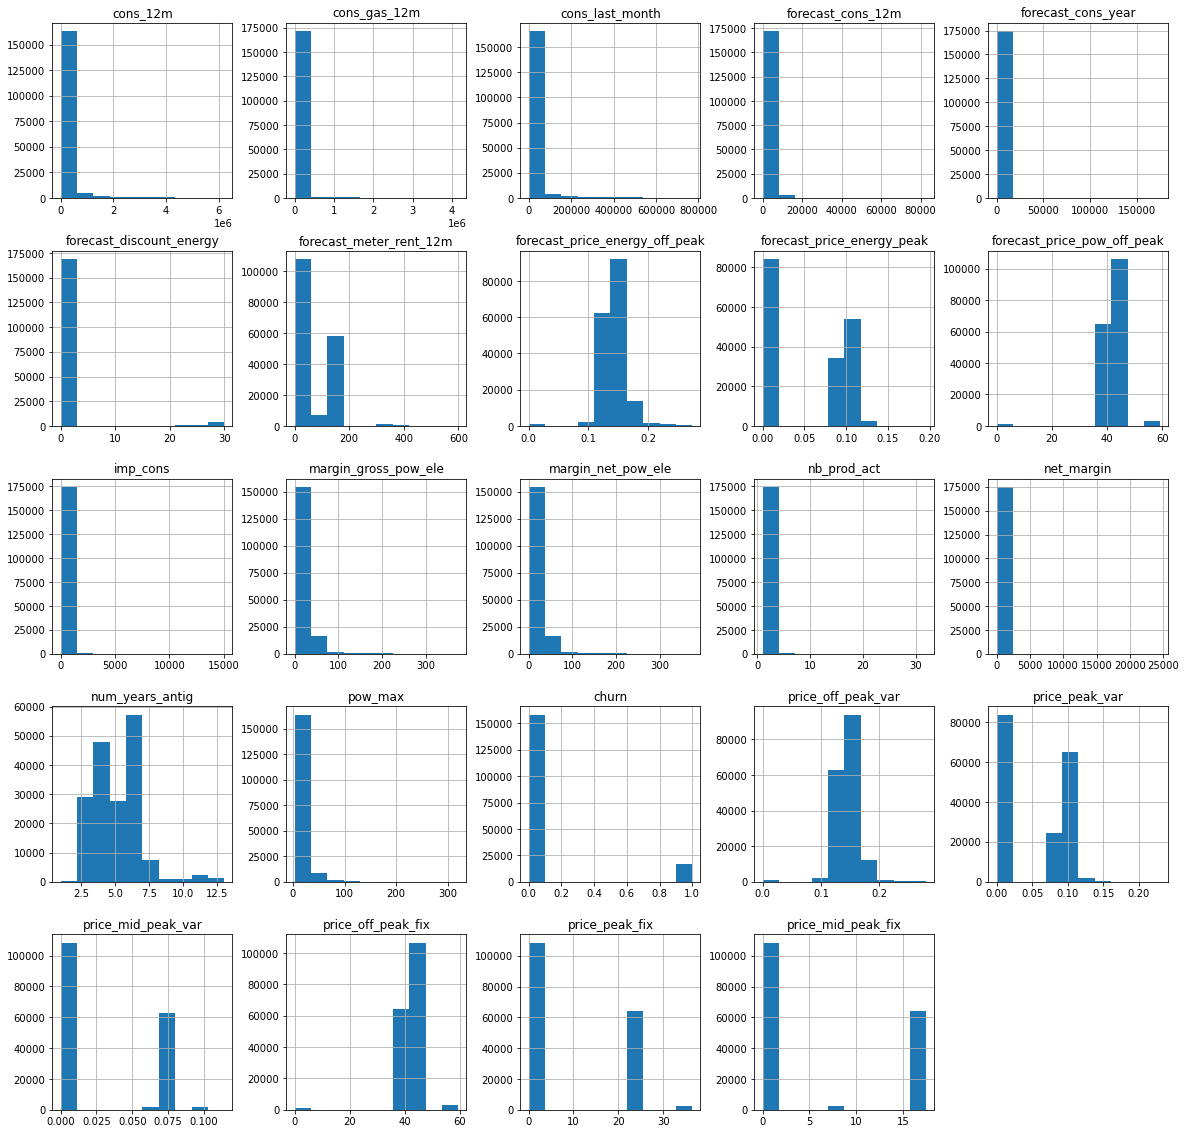

In [16]:
# Plot a 'histogram' of numerical column of the merged data
merged_data.hist(figsize=(20,20))
plt.show()

In [17]:
# Let’s perform some exploratory data analysis to gain a better understanding of the independent variables in the dataset 
# and their relationship with 'churn' dependent variable

churn_counts = merged_data['churn'].value_counts()
print(churn_counts)

0    158146
1     17003
Name: churn, dtype: int64


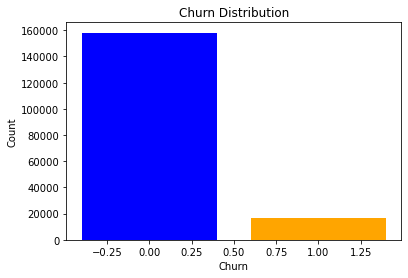

In [18]:
# Plot the churned clients variation by using bar plot

colors = ['blue', 'orange']
plt.bar(churn_counts.index, churn_counts.values, color=colors)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [19]:
# Average values of numerical features for churned users

merged_data[merged_data['churn'] == 1].mean()

C:\Users\praka\AppData\Local\Temp\ipykernel_13592\2738964703.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_data[merged_data['churn'] == 1].mean()


cons_12m                          78943.054167
cons_gas_12m                       9248.511792
cons_last_month                    7213.902782
forecast_cons_12m                  1962.145197
forecast_cons_year                 1374.616950
forecast_discount_energy              1.233665
forecast_meter_rent_12m              72.002211
forecast_price_energy_off_peak        0.136484
forecast_price_energy_peak            0.054862
forecast_price_pow_off_peak          43.333728
imp_cons                            151.173919
margin_gross_pow_ele                 30.477045
margin_net_pow_ele                   30.477045
nb_prod_act                           1.260307
net_margin                          228.312226
num_years_antig                       4.634359
pow_max                              19.390412
churn                                 1.000000
price_off_peak_var                    0.141898
price_peak_var                        0.056554
price_mid_peak_var                    0.033343
price_off_pea

- Based on the above mean data the major reasons for the churning of the customers are:

--> The variable with the highest average value for customers who churned is 'cons_12m'. This suggests that customers who have a "high consumption of electricity in the past 12 months" are more likely to churn

--> The variable with the second highest average value for customers who churned is 'cons_gas_12m'. This suggests that customers who have a "high consumption of gas in the past 12 months" are more likely to churn

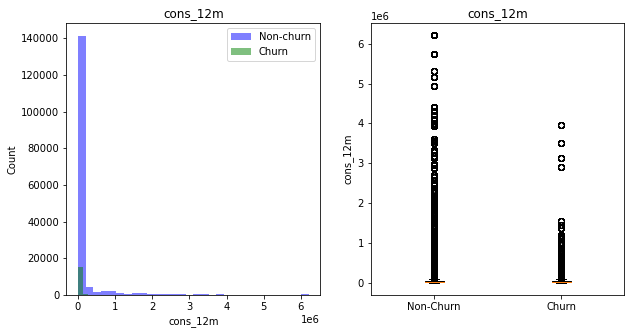

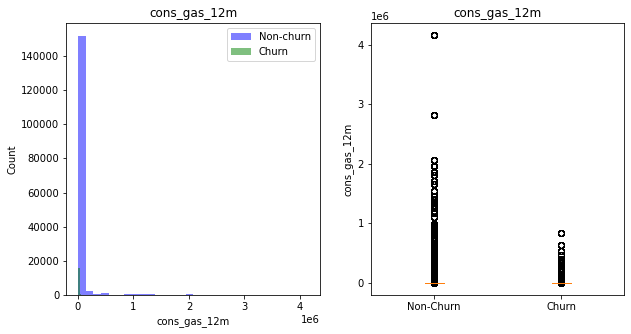

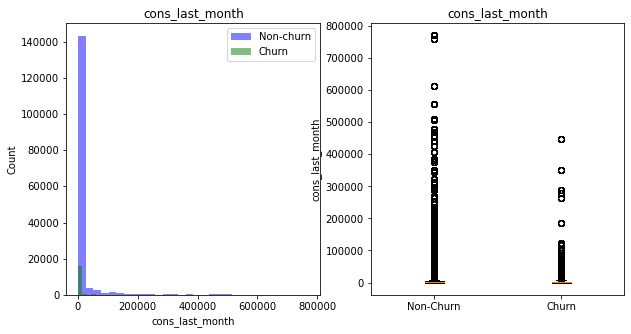

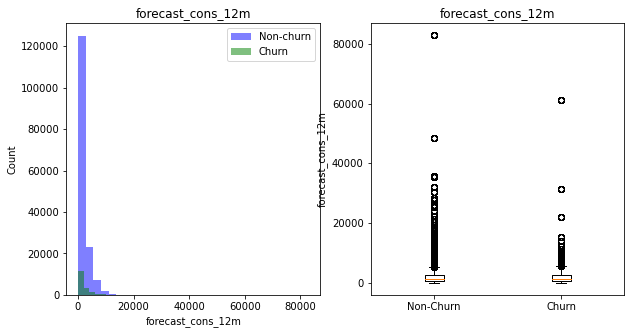

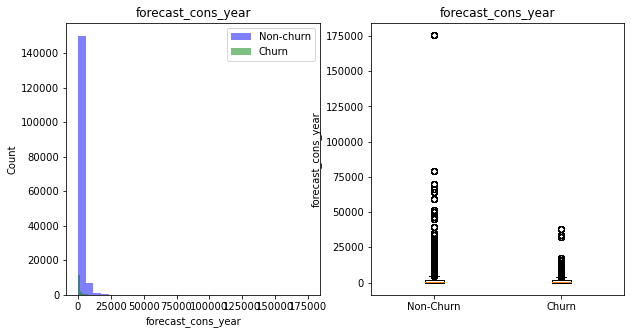

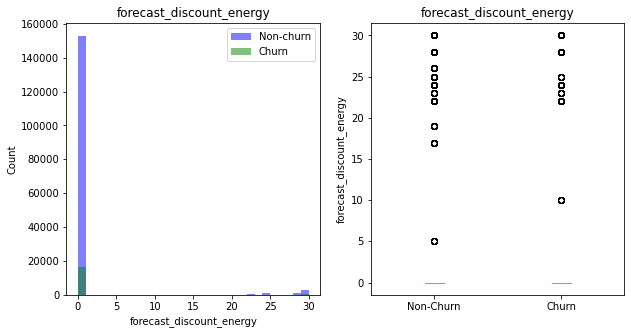

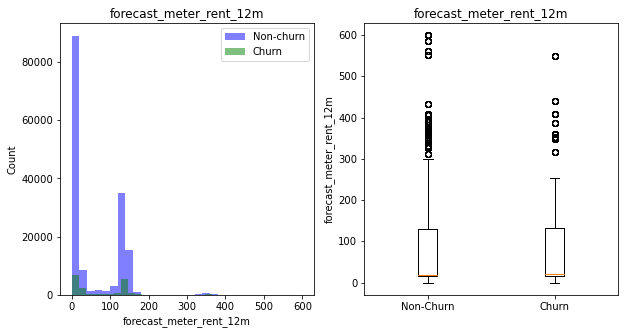

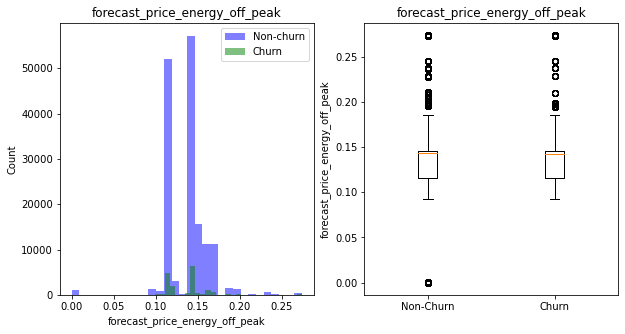

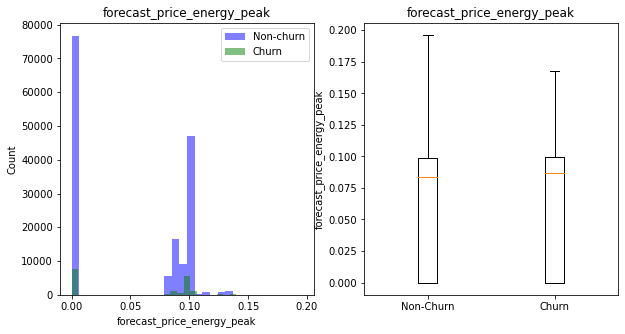

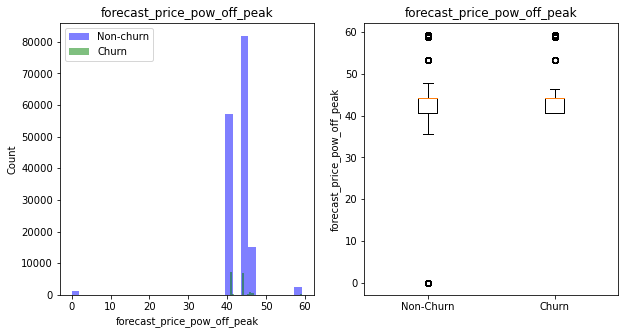

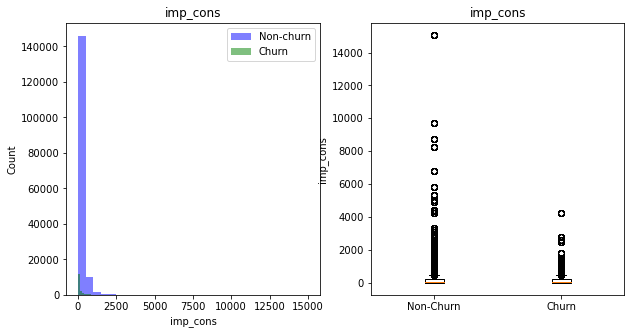

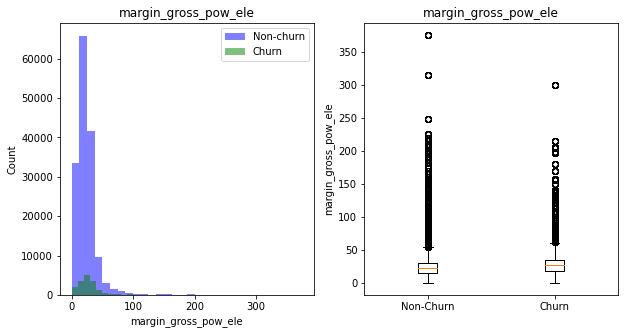

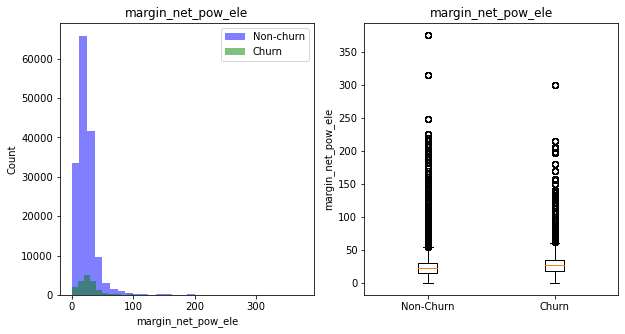

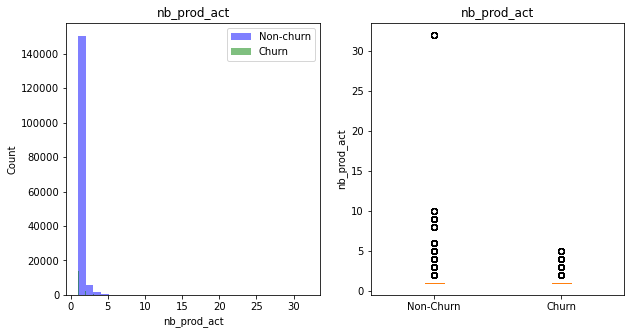

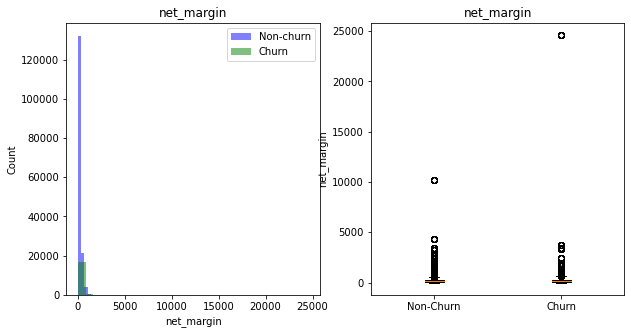

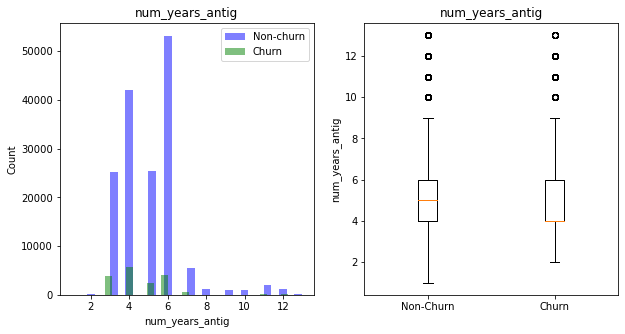

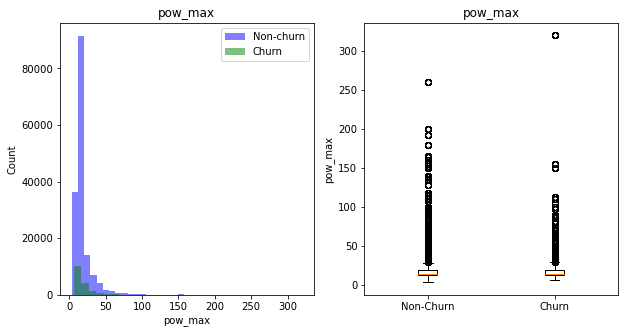

In [20]:
# Analyze the 'Numerical variables' and their relationship with the 'churn' variable 
# By using 'histogram' and 'barplot'

numerical_variable = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year',
                     'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
                     'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele',
                     'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max']

for var in numerical_variable:
    fig, axs = plt.subplots(ncols=2, figsize=(10,5))
    axs[0].hist(merged_data.loc[merged_data['churn'] == 0, var], bins=30, alpha=0.5, color='blue', label='Non-churn')
    axs[0].hist(merged_data.loc[merged_data['churn'] == 1, var], bins=30, alpha=0.5, color='green', label='Churn')
    axs[0].set(title=var, xlabel=var, ylabel='Count')
    axs[0].legend()
    
    axs[1].boxplot([merged_data.loc[merged_data['churn'] == 0, var], merged_data.loc[merged_data['churn'] == 1, var]],
                  labels=['Non-Churn', 'Churn'])
    axs[1].set(title=var, ylabel=var)
    plt.show()

In [60]:
# To find out clients are mostly churned using correlation matrix

corr_matrix = merged_data.corr()
corr_churn = corr_matrix['churn'].sort_values(ascending=False)
print(corr_churn)

churn                             1.000000
margin_net_pow_ele                0.095820
margin_gross_pow_ele              0.095774
price_peak_fix                    0.046852
price_mid_peak_var                0.046120
price_mid_peak_fix                0.044446
forecast_meter_rent_12m           0.044257
net_margin                        0.041077
pow_max                           0.030414
price_peak_var                    0.029314
forecast_price_energy_peak        0.029254
forecast_discount_energy          0.017113
price_off_peak_fix                0.016643
forecast_price_pow_off_peak       0.014872
forecast_cons_12m                 0.012882
imp_cons                         -0.001552
forecast_cons_year               -0.002540
price_off_peak_var               -0.006075
forecast_price_energy_off_peak   -0.010703
nb_prod_act                      -0.014780
cons_gas_12m                     -0.037897
cons_last_month                  -0.045237
cons_12m                         -0.045918
num_years_a

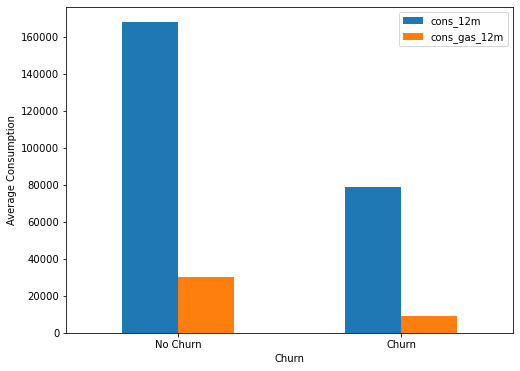

In [21]:
# Aveage Consumption of 'cons_12m' and 'cons_gas_!2m'

import matplotlib.pyplot as plt

grouped_data = merged_data.groupby('churn')[['cons_12m', 'cons_gas_12m']].mean()
fig, ax = plt.subplots(figsize=(8,6))
grouped_data.plot(kind='bar', ax=ax)
ax.set_xlabel('Churn')
ax.set_ylabel('Average Consumption')
ax.set_xticklabels(['No Churn', 'Churn'], rotation=0)
plt.show()

In [22]:
merged_data.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
price_date                        0
price_off_peak_var          

# Build a model to predict a customer churn

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

# iterate through all the non-numeric columns and label encode them
for col in merged_data.columns:
    if merged_data[col].dtype == 'object':
        merged_data[col] = le.fit_transform(merged_data[col])

In [28]:
# Encode the non-numeric columns
X_train['date_modif_prod'] = le.fit_transform(X_train['date_modif_prod'].astype(str))
X_train['date_renewal'] = le.fit_transform(X_train['date_renewal'].astype(str))
X_train['has_gas'] = le.fit_transform(X_train['has_gas'].astype(str))
X_train['origin_up'] = le.fit_transform(X_train['origin_up'].astype(str))

X_test['date_modif_prod'] = le.fit_transform(X_test['date_modif_prod'].astype(str))
X_test['date_renewal'] = le.fit_transform(X_test['date_renewal'].astype(str))
X_test['has_gas'] = le.fit_transform(X_test['has_gas'].astype(str))
X_test['origin_up'] = le.fit_transform(X_test['origin_up'].astype(str))

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

X = merged_data.drop(['id', 'churn'], axis=1)
y = merged_data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predict and evaluate the model
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[31705     0]
 [ 3322     3]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     31705
           1       1.00      0.00      0.00      3325

    accuracy                           0.91     35030
   macro avg       0.95      0.50      0.48     35030
weighted avg       0.91      0.91      0.86     35030



C:\Users\praka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- OBSERVATIONS(Logistic Regression)

--> The confusion matrix and classification report shows that the 'logistic regression' model has a high accuracy of 91% in predicting the class 0 (Customers not churned)

--> But this model performs poorly in predicting the class (Customers churned) recall of only 0.0 and f1 score is 0.0 but the accuracy is 100%

--> This model is correctly predicting all of "the customers who are actually churned" (True Positive)

--> Failing to identify many customers who are likely to churn(False Negative)

--> Overall model performance is high

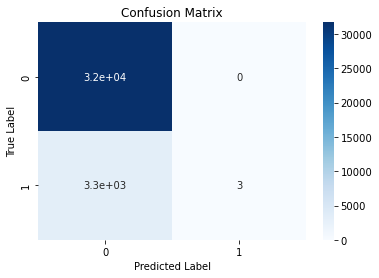

In [29]:
# Plot the confusion matrix and classification report

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

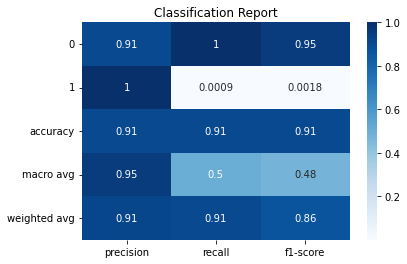

In [30]:
cr = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

In [31]:
# Build a Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X = merged_data.drop(['id', 'churn'], axis=1)
y = merged_data['churn']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[31705     0]
 [    0  3325]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31705
           1       1.00      1.00      1.00      3325

    accuracy                           1.00     35030
   macro avg       1.00      1.00      1.00     35030
weighted avg       1.00      1.00      1.00     35030



In [32]:
# Perform cross validation - for overfitted models

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(max_depth=5, max_features=5, random_state=42)

scores = cross_val_score(rfc, X, y, cv=5)
print("Mean Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Mean Accuracy: 0.90 (+/- 0.00)


In [33]:
# We have reduced overfitted models

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X = merged_data.drop(['id', 'churn'], axis=1)
y = merged_data['churn']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict churn values for test data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[31705     0]
 [ 3077   248]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     31705
           1       1.00      0.07      0.14      3325

    accuracy                           0.91     35030
   macro avg       0.96      0.54      0.55     35030
weighted avg       0.92      0.91      0.88     35030



- OBSERVATIONS(Random Forest Classifeir Model)

--> From the confusion matrix, we can see that the model correctly predicted all of the non-churned customers in the test set (31705 true negative) and incorrectly (predicted 3077 false negatives), which represent the customers who actually churned but were predicted as non-churners by the model

--> The model correctly predicted 248 customers who churned (true positives) and no false positives

--> From classification report, we can see that the model has a high precision and recall for the non-churned class, indicating that it is able to accurately identify customers "who are unlikely to churn"

--> Model has an accuracy of 91% on the test set, which is relatively high. However, accuracy may not be the best metric to evaluate the performance of a model when 'classes are imbalanced' as in this case where the non-churned customers is much higher than the number of churned customers

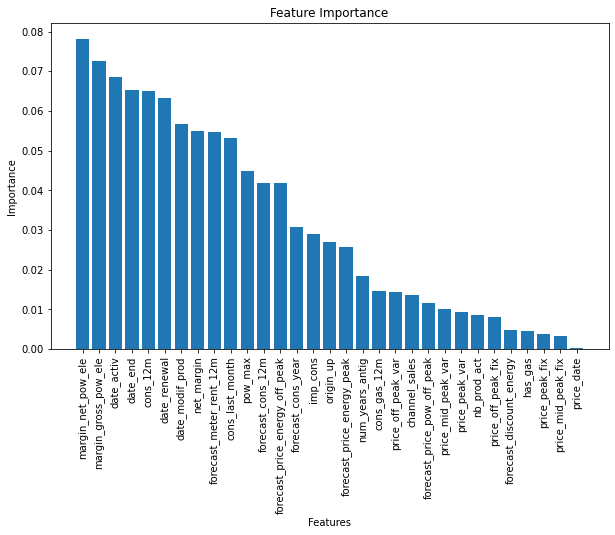

In [34]:
# PLot a random forest classifier - "feature importance" plot

import matplotlib.pyplot as plt
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
names = [feature_names[i] for i in indices]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

-->BASED ON RANDOM FOREST CLASSIFIER

- The model has overall accuracy of 91%, which means that it correctly predicts wheather a customer will churn or not 91% of the time.

- The confusion matrix shows that out of the 35,030 customers in the test set, the model correctly identified 31,705 as not churning (true negative) and 248 as churning (true positives). However, it incorrectly identified 3077 as churing(false positive) and 0 as not churning (false positive)

- The classification report shows that the model has a high precision(1.00) for predicting customers who will churn, but a low recall (0.07).  This model correctly identifies almost all customers who will churn, but it also predicts a lot of false positive.

- The model is good at predicting customers who will churn, but it may also predict false positive which could lead to unnecessary retention efforts for customers who are likely to churn

# Plot a histogram

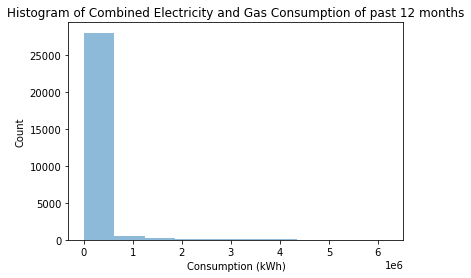

In [35]:
# Lets plot for client_data - 'cons_12m' and 'cons_gas_12m'  are around 50% of 
# Customers are churned based on these factors.

import matplotlib.pyplot as plt
import pandas as pd
combined_cons = pd.concat([client_data['cons_12m'], client_data['cons_gas_12m']])
plt.hist(combined_cons, alpha=0.5)
plt.xlabel('Consumption (kWh)')
plt.ylabel('Count')
plt.title('Histogram of Combined Electricity and Gas Consumption of past 12 months')
plt.show()

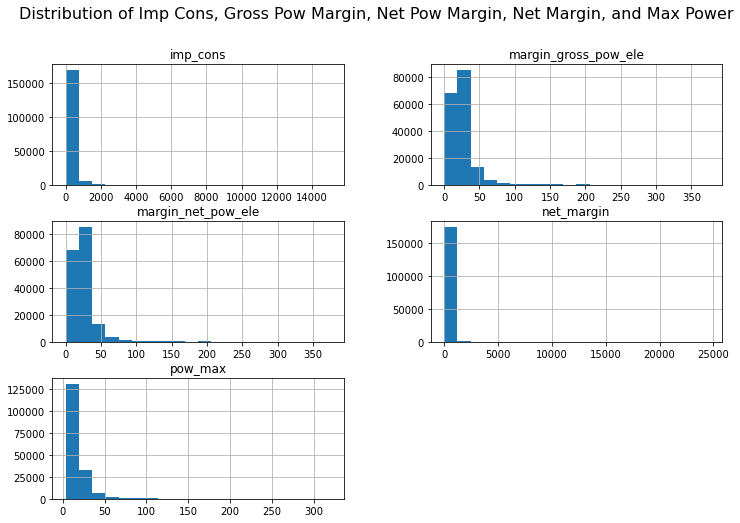

In [20]:
# Plot a histogram for 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin','pow_max'

import matplotlib.pyplot as plt
merged_data[['imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']].hist(bins=20, figsize=(12,8))
plt.suptitle("Distribution of Imp Cons, Gross Pow Margin, Net Pow Margin, Net Margin, and Max Power", fontsize=16)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

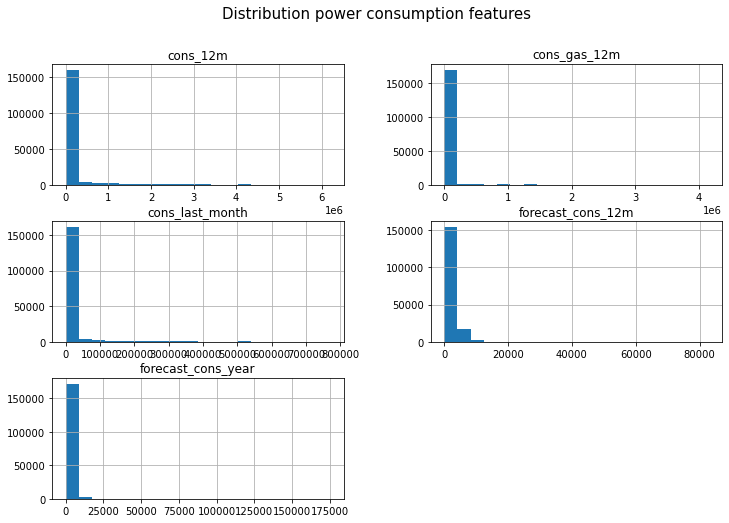

In [21]:
# Plot a histogram for power consumption feature

import matplotlib.pyplot as plt
merged_data[['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m', 'forecast_cons_year']].hist(bins=20, figsize=(12,8))
plt.suptitle("Distribution power consumption features", fontsize=15)
plt.xlabel("Counts")
plt.ylabel("Frequency")
plt.show()

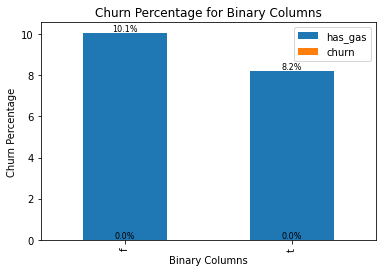

In [38]:
# Churn percentage for client_data

import matplotlib.pyplot as plt

binary_cols = ['has_gas', 'churn']
binary_churn_percentages = pd.DataFrame()
for col in binary_cols:
    binary_churn_percentages[col] = client_data.groupby(col)['churn'].mean() * 100

ax = binary_churn_percentages.plot(kind='bar', stacked=True)
ax.set_xlabel('Binary Columns')
ax.set_ylabel('Churn Percentage')
ax.set_title('Churn Percentage for Binary Columns')

for rect in ax.containers:
    ax.bar_label(rect, labels=[f'{h:.1f}%' for h in rect.datavalues], label_type='edge', fontsize=8)
    
plt.show()

In [39]:
churn_prob = pd.DataFrame(logreg.predict_proba(X)[:,1], columns=['churn_prob'])
merged_data = pd.concat([merged_data.reset_index(drop=True), churn_prob], axis=1)
high_churn_prob = merged_data[merged_data['churn_prob'] > 0.5]

In [40]:
discounted_prices = merged_data['cons_12m'] * 0.8
high_churn_prob.loc[:, 'discounted_prices'] = discounted_prices

C:\Users\praka\AppData\Local\Temp\ipykernel_13592\605620279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_churn_prob.loc[:, 'discounted_prices'] = discounted_prices


In [41]:
# Display the customers with high churn probability and their discounted prices
print(high_churn_prob[['id', 'churn_prob', 'discounted_prices']])

          id  churn_prob  discounted_prices
31136  14345    0.539386           446842.4
31137  14345    0.539378           446842.4
31138  14345    0.539371           446842.4
31139  14345    0.539363           446842.4
31140  14345    0.539355           446842.4
31141  14345    0.540337           446842.4
31142  14345    0.540330           446842.4
31143  14345    0.539318           446842.4
31144  14345    0.539310           446842.4
31145  14345    0.539302           446842.4
31146  14345    0.539294           446842.4
31147  14345    0.539287           446842.4


# Find Price Sensitivity and Discount strategy

- To find price sensitivity we use a linear regression analysis to determine how one variable("price") is affect the another variable("churn")

- By using a linear regression to build a model that predicts the value of the discounted price based on the value of original price( "cons_12m" column)

In [42]:
discounted_prices = merged_data['cons_12m'] * 0.8
merged_data.loc[:, 'discounted_prices'] = discounted_prices
high_churn_prob = merged_data[merged_data['churn_prob'] > 0.5]

In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = merged_data[['cons_12m']]
y = merged_data['discounted_prices']
lr.fit(X,y)

LinearRegression()

In [44]:
print("Price sensitivity:", lr.coef_[0])

Price sensitivity: 0.8000000000000159


- On above price sensitivity value of 0.8, conclude that customers in this dataset are somewhat price sensitive

- 20% discount may have a positive impact on customer retention, as it results may reeduce the likehood of churn for customers who are price sensitive

In [45]:
print(high_churn_prob[['id', 'churn_prob', 'cons_12m', 'discounted_prices']])

          id  churn_prob  cons_12m  discounted_prices
31136  14345    0.539386    558553           446842.4
31137  14345    0.539378    558553           446842.4
31138  14345    0.539371    558553           446842.4
31139  14345    0.539363    558553           446842.4
31140  14345    0.539355    558553           446842.4
31141  14345    0.540337    558553           446842.4
31142  14345    0.540330    558553           446842.4
31143  14345    0.539318    558553           446842.4
31144  14345    0.539310    558553           446842.4
31145  14345    0.539302    558553           446842.4
31146  14345    0.539294    558553           446842.4
31147  14345    0.539287    558553           446842.4


# To reduce churning based on correlation coefficient

In [24]:
features = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 
            'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max','churn']
corr_matrix = merged_data[features].corr()
corr_churn = corr_matrix['churn'].sort_values(ascending=False)
top_features = corr_churn[abs(corr_churn) > 0.1].index.tolist()
top_features.remove('churn')
print(corr_churn)

churn                             1.000000
margin_net_pow_ele                0.095820
margin_gross_pow_ele              0.095774
forecast_meter_rent_12m           0.044257
net_margin                        0.041077
pow_max                           0.030414
forecast_price_energy_peak        0.029254
forecast_discount_energy          0.017113
forecast_price_pow_off_peak       0.014872
forecast_cons_12m                 0.012882
imp_cons                         -0.001552
forecast_cons_year               -0.002540
forecast_price_energy_off_peak   -0.010703
nb_prod_act                      -0.014780
cons_gas_12m                     -0.037897
cons_last_month                  -0.045237
cons_12m                         -0.045918
num_years_antig                  -0.074033
Name: churn, dtype: float64


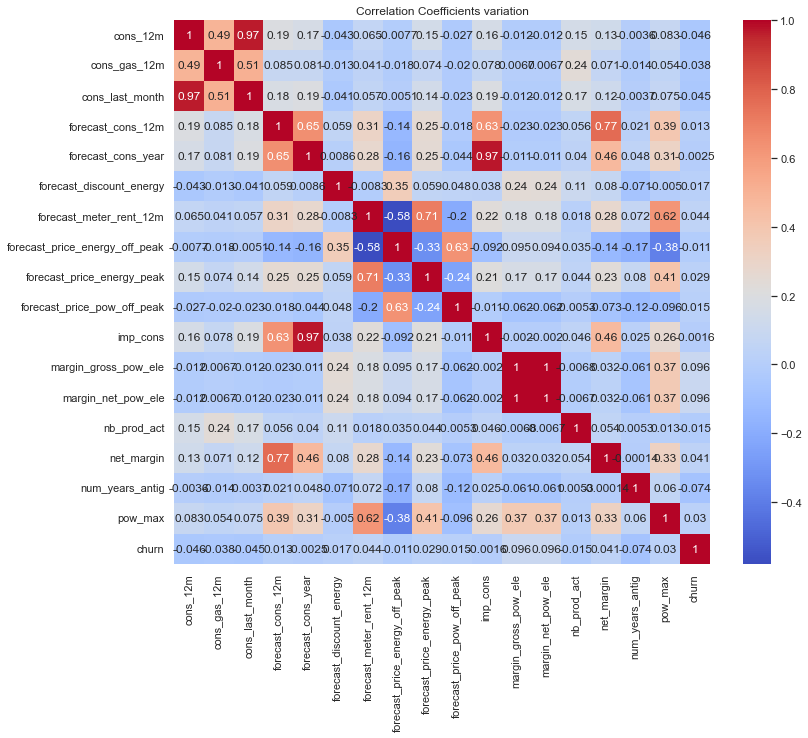

In [25]:
# PLot the correlation coefficient result

import seaborn as sns
import matplotlib.pyplot as plt

features = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 
            'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max','churn']
corr_matrix = merged_data[features].corr()

sns.set(style='white')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Coefficients variation')
plt.show()

- Darker color indicates stronger correlation